## A brief overview of data-structures

### For all purposes
```python
data = [sentences]
sentence = [elements]
element = {
    'word': bruh,
    'lang': en,
    'pos': X
}
```

- words: the "words" of the data
- lang: e, h, b, t, n
    - e: english
    - h: hindi
    - b: bengali
    - t: tamil
    - n: naaahh (rest)
- pos: the part of speech



In [2]:
import regex
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
with open('hi_en_dataset.json') as f:
    json_data = json.load(f)

In [4]:
data = []
for key, value in json_data.items():
    temp = value['sentence']
    if len(temp) >= 10:
        data.append(temp)

In [5]:
def grammify(data, n, item):
    """
    Builds the gram_data dictionary
    inputs:
        data: a list of sentences
        sentences: a list of dict containing all the information
        n: the n in n-gram
        item: the dictionary key
    outputs:
        gram_data:
            a list of tuples of (value, key) pairs.
            value as the frequency of the gram,
            given by the key
    """
    d = {}
    for sentence in data:
        x = len(sentence)
        for i in range(x-n+1):
            window = sentence[i:i+n]
            key = ""
            for element in window:
                key += element[item] + " "

            if key in d:
                d[key] += 1
            else:
                d[key] = 1

    d = [(v, k) for k, v in d.items()]
    return sorted(d, reverse=True)

In [6]:
def plot_gram_data(gram_data, language, gram, item):
    """
    Plots the gram data.
    inputs:
        gram_data:
            a list of tuples of (value, key) pairs.
            value as the frequency of the gram,
            given by the key
        
        language:
            the name of the data in concern
        gram:
            the n of the data in concern
        data:
            the item in concern
    """
    n = len(gram_data)
    labels = [item[1] for item in gram_data]
    heights = [item[0] for item in gram_data]
    plt.figure(figsize=(20,10))
    plt.bar(x=np.arange(n), height=heights, tick_label=labels)
    plt.title(f"{language}: for n={gram} and parameter={item}")
    plt.xticks(rotation=90)
    plt.show()

In [7]:
def find_gram(data, query, item, is_regex):
    """
    Finds the requested query in the data. 
    Could be plain search or regex search.
    Helpful for getting samples for analysis.
    
    inputs:
        data:
            the data where the query is searched
        query:
            the request on what to search. space separated for bigger n
        item:
            the item to be searched for. could be 'token', 'pos', 'lang'    
        is_regex: 
            if the query is regex or not
    outputs:
        returns a list of all the sentences containing the query
    """
    # stores the final results of the data
    query_results = []

    focused_sentences = []
    for sentence in data:
        extracted_string = ""
        for element in sentence:
            extracted_string += element[item] + " "
        focused_sentences.append((sentence, extracted_string[:-1]))
    print("done reformatting the data")

    if is_regex:
        pattern = regex.compile(query)
        query_results = [
            sentence for sentence, extracted_string in focused_sentences 
            if len(pattern.findall(extracted_string))
        ]
    else:
        query_results = [
            sentence for sentence, extracted_string in focused_sentences
            if query in extracted_string
        ]
    print(f"Found {len(query_results)} matches.")
    return query_results

In [8]:
def get_extracted_data(data, item="word"):
    """
    Shows what you want to see
    inputs:
        data:
            the entire data (possibly extraced one with regex)
        item:
            the item to print out. default is word
    outputs:
        a list of sentences which have tokens as `items`
    """
    extracted_data = []
    for i, sentence in enumerate(data):
        temp = f"{i}. "
        for element in sentence:
            temp += element['word'] + "/" + element['pos'] + " "
        extracted_data.append(temp[:-1])
    print(f"Length of extracted data: {len(extracted_data)}")
    return extracted_data

In [9]:
# def get_sentence_language():
#     pass

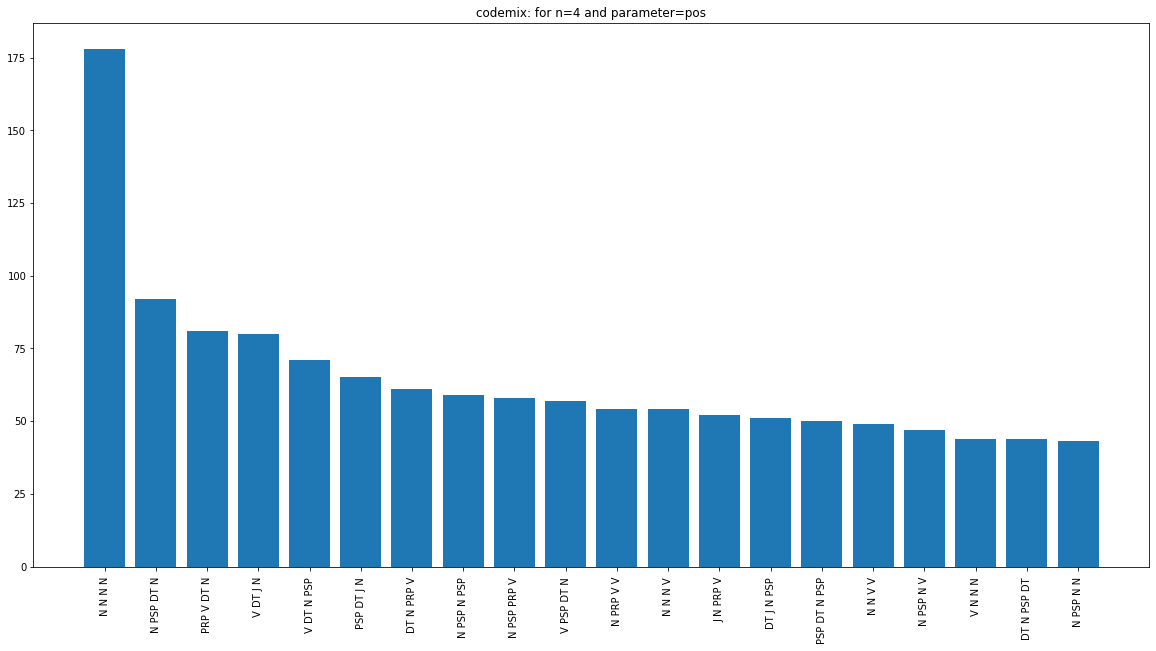

In [16]:
gram = 4
item = 'pos'
plot_gram_data(grammify(data, gram, item)[:20], language='codemix', gram=gram, item=item)

In [74]:
# find_gram(data, query="what", item="word", is_regex=False)

In [75]:
# level1_data = find_gram(data, query="", item="pos", is_regex=True)
# level2_data = find_gram(level1_data, query="(kind)", item="word", is_regex=True)
# get_extracted_data(level1_data, item="pos")

In [17]:
# get_extracted_data(data)